--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
-------------------------------

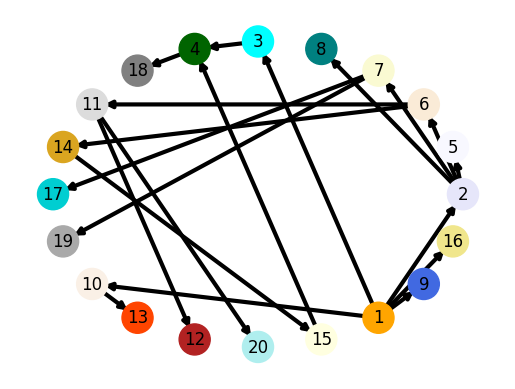

In [1]:
# external imports
import copy
import multiprocessing

# local imports
from classes.cbnetwork import CBN
from classes.globaltopology import GlobalTopology
from classes.localtemplates import LocalNetworkTemplate

# save the number of CPUs
NUM_CPUS = multiprocessing.cpu_count()

# pass the parameters
N_LOCAL_NETWORKS = 20
N_VARS_NETWORK = 20
N_OUTPUT_VARS = 2
N_INPUT_VARS = 2
V_TOPOLOGY = 2
N_MAX_CLAUSES = 2
N_MAX_LITERALS = 2

# GENERATE THE LOCAL NETWORK TEMPLATE
o_template = LocalNetworkTemplate(n_vars_network=N_VARS_NETWORK, n_input_variables=N_INPUT_VARS,
                                  n_output_variables=N_OUTPUT_VARS, n_max_of_clauses=N_MAX_CLAUSES,
                                  n_max_of_literals=N_MAX_LITERALS, v_topology=V_TOPOLOGY)

# GENERATE THE GLOBAL TOPOLOGY
o_global_topology = GlobalTopology.generate_sample_topology(v_topology=V_TOPOLOGY,
                                                            n_nodes=N_LOCAL_NETWORKS)

# generate aleatory CBN by topology
o_cbn = CBN.generate_cbn_from_template(v_topology=V_TOPOLOGY,
                                       n_local_networks=N_LOCAL_NETWORKS,
                                       n_vars_network=N_VARS_NETWORK,
                                       o_template=o_template,
                                       l_global_edges=o_global_topology.l_edges)

# Crear copias profundas del objeto original
o_cbn1 = copy.deepcopy(o_cbn) # Serial
o_cbn2 = copy.deepcopy(o_cbn) # Parallel Simple
o_cbn3 = copy.deepcopy(o_cbn) # Parallel with weights

# show the CBN Graph
o_cbn1.plot_topology()

# Find Local attractors

In [2]:
o_cbn1.find_local_attractors_sequential()

**************************************************
FIND LOCAL ATTRACTORS
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 1
--------------------------------------------------
Network: 1  Local Scene: None
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 2
--------------------------------------------------
Network: 2  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 2  Local Scene: 1
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 3
--------------------------------------------------
Network: 3  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 3  Local Scene: 1
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 4
--------------------------------------------------
Network: 4  Local Scene: 00
end find attractors
-------

In [3]:
o_cbn2.find_local_attractors_parallel(num_cpus=NUM_CPUS)

**************************************************
FIND LOCAL ATTRACTORS PARALLEL
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------





----------------------------------------------------------------------------------------------------


FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:
FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:

FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:    FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NE

In [4]:
o_cbn3.find_local_attractors_parallel_with_weigths(num_cpus=NUM_CPUS)

**************************************************
FIND LOCAL ATTRACTORS WEIGHTED BALANCED

Número de workers: 12
Distribución de tareas por bucket antes de la ejecución:
  Bucket 0: 1 tasks, total weight: 22
  Bucket 1: 2 tasks, total weight: 42
  Bucket 2: 2 tasks, total weight: 42
  Bucket 3: 2 tasks, total weight: 42
  Bucket 4: 2 tasks, total weight: 42
  Bucket 5: 2 tasks, total weight: 42
  Bucket 6: 2 tasks, total weight: 42
  Bucket 7: 2 tasks, total weight: 42
  Bucket 8: 2 tasks, total weight: 41
  Bucket 9: 1 tasks, total weight: 21
  Bucket 10: 1 tasks, total weight: 21
  Bucket 11: 1 tasks, total weight: 21
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------

In [5]:
o_cbn1.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 7
Network: 1 - Scene: []
Attractors number: 7
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1']
['1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1']
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1']
['1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1']
--------------------------------------------------
Global index: 2 -> (1, 1, 2)
['1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1']
['1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1']
['1', '1', 

In [6]:
o_cbn2.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 7
Network: 1 - Scene: []
Attractors number: 7
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1']
['1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1']
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1']
['1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1']
--------------------------------------------------
Global index: 2 -> (1, 1, 2)
['1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1']
['1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1']
['1', '1', 

In [7]:
o_cbn3.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 7
Network: 1 - Scene: []
Attractors number: 7
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1']
['1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1']
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1']
['1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1']
--------------------------------------------------
Global index: 2 -> (1, 1, 2)
['1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1']
['1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1']
['1', '1', 

In [8]:
len(o_cbn3.l_local_networks)

20

In [9]:
o_cbn1.find_compatible_pairs()

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
END FIND ATTRACTOR PAIRS


In [10]:
o_cbn2.find_compatible_pairs_parallel(num_cpus=NUM_CPUS)

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL)
Tareas creadas: 20
Resultados obtenidos: 20
--------------------------------------------------
END FIND COMPATIBLE ATTRACTOR PAIRS (Total pairs: 791)


In [11]:
o_cbn3.find_compatible_pairs_parallel_with_weights(num_cpus=NUM_CPUS)

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL WITH WEIGHTS)

Número de CPUs: 12
Distribución de tareas por bucket antes de la ejecución:
  Bucket 0: 1 tasks, total weight: 26
  Bucket 1: 2 tasks, total weight: 20
  Bucket 2: 2 tasks, total weight: 20
  Bucket 3: 2 tasks, total weight: 20
  Bucket 4: 2 tasks, total weight: 18
  Bucket 5: 2 tasks, total weight: 18
  Bucket 6: 2 tasks, total weight: 18
  Bucket 7: 2 tasks, total weight: 18
  Bucket 8: 2 tasks, total weight: 18
  Bucket 9: 1 tasks, total weight: 10
  Bucket 10: 1 tasks, total weight: 10
  Bucket 11: 1 tasks, total weight: 10

Número de tareas procesadas: 20
Total de pares de atractores: 1582

Información final de los buckets:
  Bucket 0: 1 tasks, total weight: 26
  Bucket 1: 2 tasks, total weight: 20
  Bucket 2: 2 tasks, total weight: 20
  Bucket 3: 2 tasks, total weight: 20
  Bucket 4: 2 tasks, total weight: 18
  Bucket 5: 2 tasks, total weight: 18
  Bucket 6: 2 tasks, total 

In [12]:
o_cbn1.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 5
--------------------------------------------------
Coupling Variable: 401, Scene: 0
--------------------------------------------------
Coupling Variable: 401, Scene: 1
(8, 47)
(8, 48)
(8, 49)
(8, 50)
(8, 51)
(8, 52)
(8, 53)
(9, 47)
(9, 48)
(9, 49)
(9, 50)
(9, 51)
(9, 52)
(9, 53)
(10, 47)
(10, 48)
(10, 49)
(10, 50)
(10, 51)
(10, 52)
(10, 53)
(13, 47)
(13, 48)
(13, 49)
(13, 50)
(13, 51)
(13, 52)
(13, 53)
(15, 47)
(15, 48)
(15, 49)
(15, 50)
(15, 51)
(15, 52)
(15, 53)
(8, 47)
(8, 48)
(8, 49)
(8, 50)
(8, 51)
(8, 52)
(8, 53)
(9, 47)
(9, 48)
(9, 49)
(9, 50)
(9, 51)
(9, 52)
(9, 53)
(10, 47)
(10, 48)
(10, 49)
(10, 50)
(10, 51)
(10, 52)
(10, 53)
(13, 47)
(13, 48)
(13, 49)
(13, 50)
(13, 51)
(13, 52)
(13, 53)
(15, 47)
(15, 48)
(15, 49)
(15, 50)
(15, 51)
(15, 52)
(15, 53)
--------------------------------------------------
Edge: 2 -> 6
--------------------------------------------------
Coupling Var

In [13]:
o_cbn2.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 5
--------------------------------------------------
Coupling Variable: 401, Scene: 0
--------------------------------------------------
Coupling Variable: 401, Scene: 1
(8, 47)
(8, 48)
(8, 49)
(8, 50)
(8, 51)
(8, 52)
(8, 53)
(9, 47)
(9, 48)
(9, 49)
(9, 50)
(9, 51)
(9, 52)
(9, 53)
(10, 47)
(10, 48)
(10, 49)
(10, 50)
(10, 51)
(10, 52)
(10, 53)
(13, 47)
(13, 48)
(13, 49)
(13, 50)
(13, 51)
(13, 52)
(13, 53)
(15, 47)
(15, 48)
(15, 49)
(15, 50)
(15, 51)
(15, 52)
(15, 53)
--------------------------------------------------
Edge: 2 -> 6
--------------------------------------------------
Coupling Variable: 402, Scene: 0
--------------------------------------------------
Coupling Variable: 402, Scene: 1
(8, 55)
(8, 56)
(8, 57)
(8, 58)
(8, 59)
(8, 60)
(8, 61)
(9, 55)
(9, 56)
(9, 57)
(9, 58)
(9, 59)
(9, 60)
(9, 61)
(10, 55)
(10, 56)
(10, 57)
(10, 58)
(10, 59)
(10, 60)
(10, 61)
(13, 55)
(13, 56)
(13

In [14]:
o_cbn3.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 5
--------------------------------------------------
Coupling Variable: 401, Scene: 0
--------------------------------------------------
Coupling Variable: 401, Scene: 1
(8, 47)
(8, 48)
(8, 49)
(8, 50)
(8, 51)
(8, 52)
(8, 53)
(9, 47)
(9, 48)
(9, 49)
(9, 50)
(9, 51)
(9, 52)
(9, 53)
(10, 47)
(10, 48)
(10, 49)
(10, 50)
(10, 51)
(10, 52)
(10, 53)
(13, 47)
(13, 48)
(13, 49)
(13, 50)
(13, 51)
(13, 52)
(13, 53)
(15, 47)
(15, 48)
(15, 49)
(15, 50)
(15, 51)
(15, 52)
(15, 53)
(8, 47)
(8, 48)
(8, 49)
(8, 50)
(8, 51)
(8, 52)
(8, 53)
(9, 47)
(9, 48)
(9, 49)
(9, 50)
(9, 51)
(9, 52)
(9, 53)
(10, 47)
(10, 48)
(10, 49)
(10, 50)
(10, 51)
(10, 52)
(10, 53)
(13, 47)
(13, 48)
(13, 49)
(13, 50)
(13, 51)
(13, 52)
(13, 53)
(15, 47)
(15, 48)
(15, 49)
(15, 50)
(15, 51)
(15, 52)
(15, 53)
--------------------------------------------------
Edge: 2 -> 6
--------------------------------------------------
Coupling Var

In [15]:
o_cbn1.mount_stable_attractor_fields()

**************************************************
FIND ATTRACTOR FIELDS


KeyboardInterrupt: 

In [88]:
o_cbn1.show_attractors_fields()